In [1]:
#How to basically get qubits, create entanglement and get results from IBM's QC
from qiskit import *


In [2]:
#Take two qubits and create a quantum register and a classical register to get values from qr and store them
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

#create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

In [3]:
#at any point in order to check the circuit we do this
%matplotlib inline
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
#Creating entanglement. Step 1 is applying a Hadamard gate
circuit.h(qr[0])

In [6]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [7]:
#this is called a controlled gate, and this is basically the classical equivalent of if this then that
circuit.cx(qr[0], qr[1])

In [8]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [9]:
#now we are measuring the bits and storing them in classical bits
circuit.measure(qr, cr)

In [10]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [11]:
#This is taking a backend simulator. What we do here is first we apply the simulator and see how the quantum bits would behave. Also, here we have used the qasm sim. If we want to get the eigen vectors, we will use the statevector simulator and for getting matrix representation of a circuit, we will use unitary as the backend sim.
simulator = Aer.get_backend('qasm_simulator')

In [12]:
result = execute(circuit, backend = simulator).result()

In [13]:
from qiskit.tools.visualization import plot_histogram

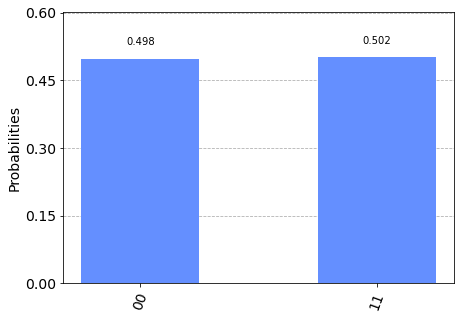

In [14]:
#This function will give us a histogram of the state our qubits should be in
plot_histogram(result.get_counts(circuit))

In [16]:
#AS we can see, the two values we get theoretically should be 00 and 11. Let's see if these are the values that we are actually getting.
#This step is to get the authentication to run our program on IBM''s QC
from qiskit import IBMQ


In [31]:
IBMQ.save_account('59fb96f75131958794b9c5d17c0333cc3588266cf7f2a38c703637a6038de54748a04a5ad8330ec229911c73fee58f71dcd09e5785cb4aa41da7e1cbf73a1c9d')

configrc.store_credentials:WARNING:2021-08-25 18:54:33,159: Credentials already present. Set overwrite=True to overwrite.


In [34]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-25 18:58:40,104: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [40]:
#choosing the provider/QC
provider = IBMQ.get_provider('ibm-q')
qc = provider.get_backend('ibmq_quito')

In [41]:
#THe following steps will execute a job on Qiskit's QC
job = execute(circuit, backend = qc)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


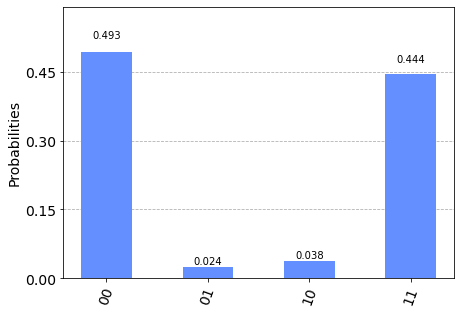

In [42]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
#So what happened here? Well, due to the experimental errors in QC such as decoherence etc. we get some probability that the qubits are in the 10 and the 01 state as well. Theoretically they should've been in the 00 and the 11 state. 